Task 2

Name : Parth Bhatia

The Sparks Foundation

In [7]:
import pandas as pd
import numpy as np

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df= pd.read_csv('Iris.csv',index_col=0)

In [21]:
#returns first 5 rows
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [22]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

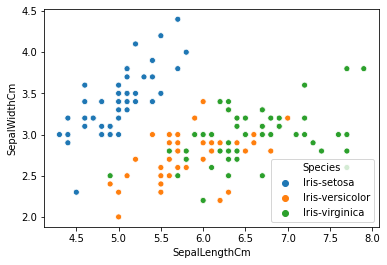

In [23]:
#TO analyse the data so that I can decide on the number of clusters
sns.scatterplot(df['SepalLengthCm'],df['SepalWidthCm'],hue=df['Species'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

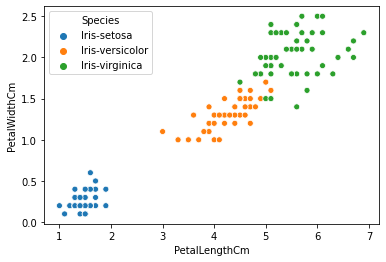

In [24]:
sns.scatterplot(df['PetalLengthCm'],df['PetalWidthCm'],hue=df['Species'])

**We don't often have the labelled data while using unsupervised learning but here we do(Species Column). It is clear from the above 2 figures that optimum numbers of cluster is 3.**

**We can also perform the famous elbow method to determine the numbers of clusters**

In [48]:
# Importing KMeans and initalising a list
from sklearn.cluster import KMeans



In [49]:
#This will give us back the feature vector array
features=df.iloc[:, [0, 1, 2, 3]].values

In [50]:
features.shape[0]

150

In [51]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Text(0, 0.5, 'SSE')

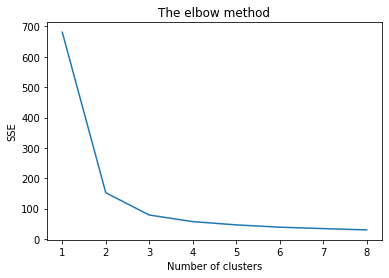

In [55]:
#Elbow method
SSE=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    SSE.append(kmeans.inertia_)

plt.plot(range(1,9),SSE)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
    


**We can also cleary see from here the optimum clusters are 3**

In [56]:
#Now we will form the clusters
clustering=KMeans(n_clusters=3)


In [57]:
clustering.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
# We can check the centroids of the clusters formed
clustering.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [59]:
#These are the lables to the data according to the cluster formed
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [67]:
df['Species']

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [71]:
def converter(x):
    if x =='Iris-setosa':
        return 0
    if x == 'Iris-versicolor':
        return 1
    else:
        return 2

In [72]:
# Labeling the orignal data using the above function
df['Cluster']=df['Species'].apply(converter)

In [73]:
df['Cluster']

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Cluster, Length: 150, dtype: int64

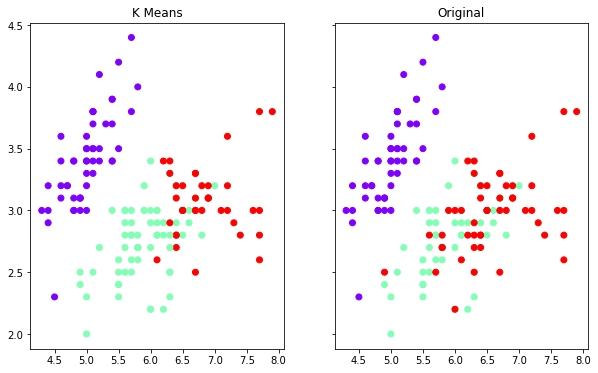

In [75]:
#Comparing the clusters formed by K Means with orignal clusters 
fig , (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c=clustering.labels_,cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c=df['Cluster'],cmap='rainbow')

By the above plot we can visuzlize the clusters formed by K-Means and our orignal data. 